In [82]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Download data from https://datamarket.com/data/set/22ti/zuerich-monthly-sunspot-numbers-1749-1983

In [54]:
sun = pd.read_csv('D:/Data/zuerich-monthly-sunspot-numbers-.csv').dropna()
sun['Month'] = pd.to_datetime(sun['Month'], format='%Y-%m')
sun.columns = ['month', 'sunspot']
sun['target'] = sun['sunspot'].shift(-1)
c = sun.columns.tolist()
sun = sun[c[-1:] + c[:-1]]
sun.head()

,target,month,sunspot
0,62.6,1749-01-01 00:00:00,58.0
1,70.0,1749-02-01 00:00:00,62.6
2,55.7,1749-03-01 00:00:00,70.0
3,85.0,1749-04-01 00:00:00,55.7
4,83.5,1749-05-01 00:00:00,85.0


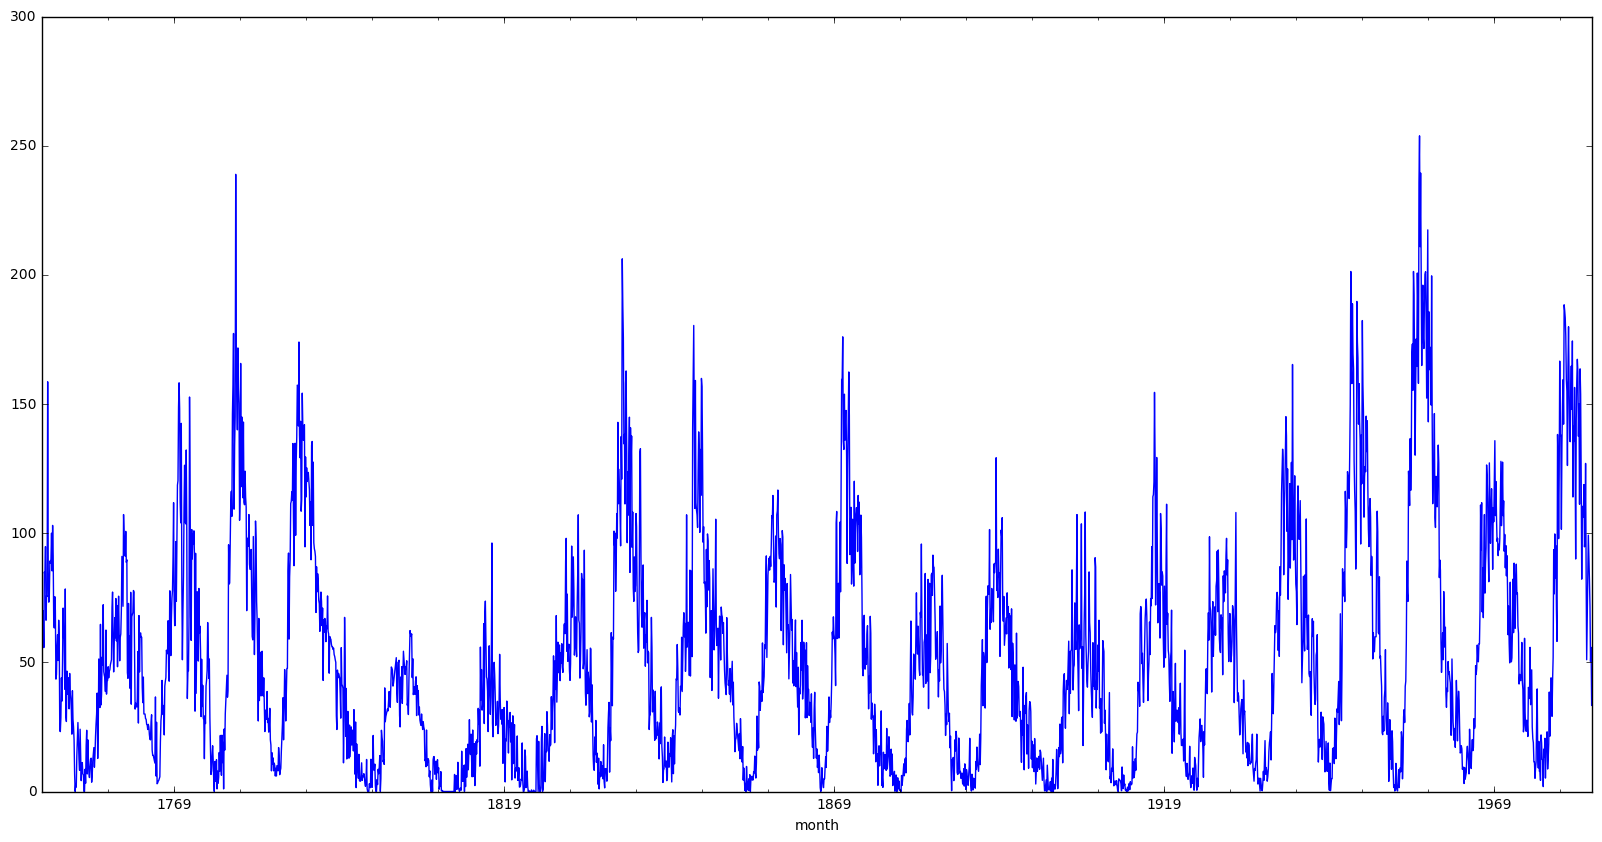

In [62]:
plt.rc('figure', figsize=(20, 10))
sun.set_index('month')['sunspot'].plot()

In [164]:
from statsmodels.robust.scale import mad

In [262]:
data = sun.copy()
data['p1'] = data['sunspot'].shift(1)
#data['p2'] = data['sunspot'].shift(2)
data['m2'] = data['sunspot'].rolling(2, min_periods=1).mean()
data['m3'] = data['sunspot'].rolling(3, min_periods=1).mean()
data['m4'] = data['sunspot'].rolling(4, min_periods=1).mean()
data['m5'] = data['sunspot'].rolling(5, min_periods=1).mean()
data['m10'] = data['sunspot'].rolling(10, min_periods=1).mean()
data['mad5'] = data['sunspot'].rolling(5, min_periods=1).apply(mad)
data['mad10'] = data['sunspot'].rolling(10, min_periods=1).apply(mad)
data['mad15'] = data['sunspot'].rolling(15, min_periods=1).apply(mad)
#data['m12'] = data['sunspot'].rolling(12, min_periods=1).mean()
#data['d1'] = data['sunspot'] - data['sunspot'].shift(1)
#data['d2'] = data['sunspot'] - data['sunspot'].shift(2)
#data['d3'] = data['sunspot'] - data['sunspot'].shift(3)
#data['sd3'] = data['sunspot'].rolling(3, min_periods=1).std()
#data['sd5'] = data['sunspot'].rolling(5, min_periods=1).std()
#data['med5'] = data['sunspot'].rolling(5, min_periods=1).median()
data = data.drop(['month'], axis=1)
print(data.shape); data = data.dropna().reset_index(drop=True); print(data.shape)
print(data.head())

c = data.columns.tolist()
train_data = data.iloc[:2000]
test_data  = data.iloc[2000:]

X_train = train_data[c[1:]]
y_train = train_data[c[0]]

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=52)
rf.fit(X_train, y_train)
print('Fitness: {:.3f}'.format(rf.score(X_train, y_train)))

(2820, 11)
(2818, 11)
   target  sunspot    p1     m2         m3         m4         m5        m10  \
0    70.0     62.6  58.0  60.30  60.300000  60.300000  60.300000  60.300000   
1    55.7     70.0  62.6  66.30  63.533333  63.533333  63.533333  63.533333   
2    85.0     55.7  70.0  62.85  62.766667  61.575000  61.575000  61.575000   
3    83.5     85.0  55.7  70.35  70.233333  68.325000  66.260000  66.260000   
4    94.8     83.5  85.0  84.25  74.733333  73.550000  71.360000  69.133333   

        mad5      mad10      mad15  
0   3.409985   3.409985   3.409985  
1   6.819970   6.819970   6.819970  
2   5.114978   5.114978   5.114978  
3  10.229955  10.229955  10.229955  
4  20.015130  14.010591  14.010591  
Fitness: 0.969


0.85505916709613561

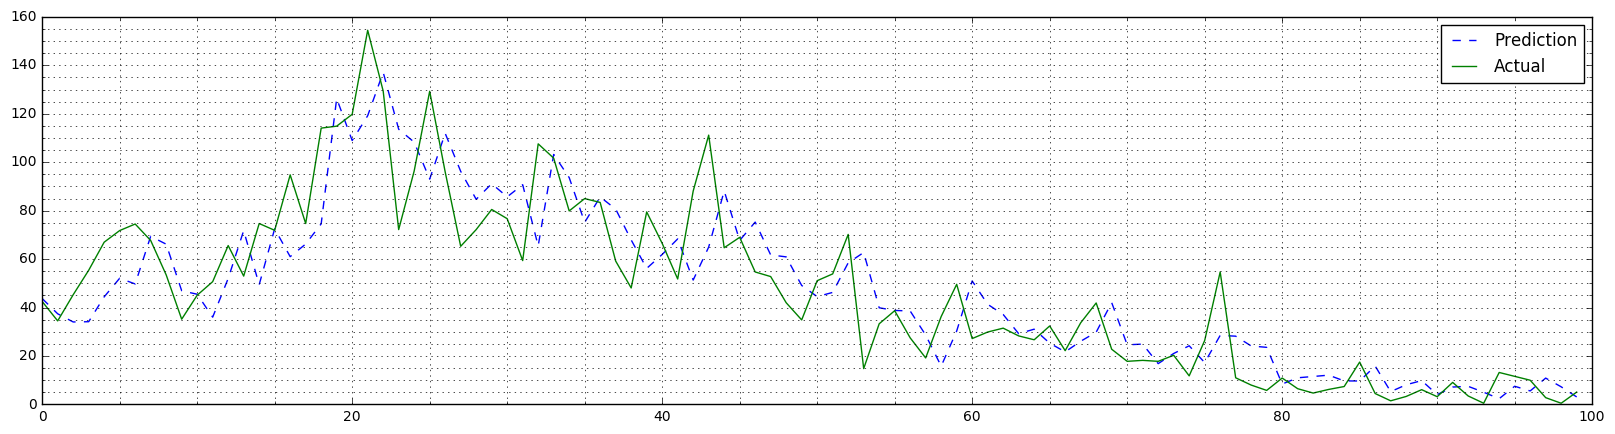

In [263]:
plt.rc('figure', figsize=(20, 5))
X = np.arange(0, 100)
plt.plot(X, rf.predict(test_data.iloc[:100][c[1:]]), label='Prediction', linestyle='--')
plt.plot(X, test_data['target'].iloc[:100], label='Actual', linestyle='-')
plt.legend()
plt.grid(b=True, which='major')
plt.grid(b=True, which='minor')
plt.minorticks_on()

rf.score(test_data[c[1:]], test_data['target'])

0.84187966837530803

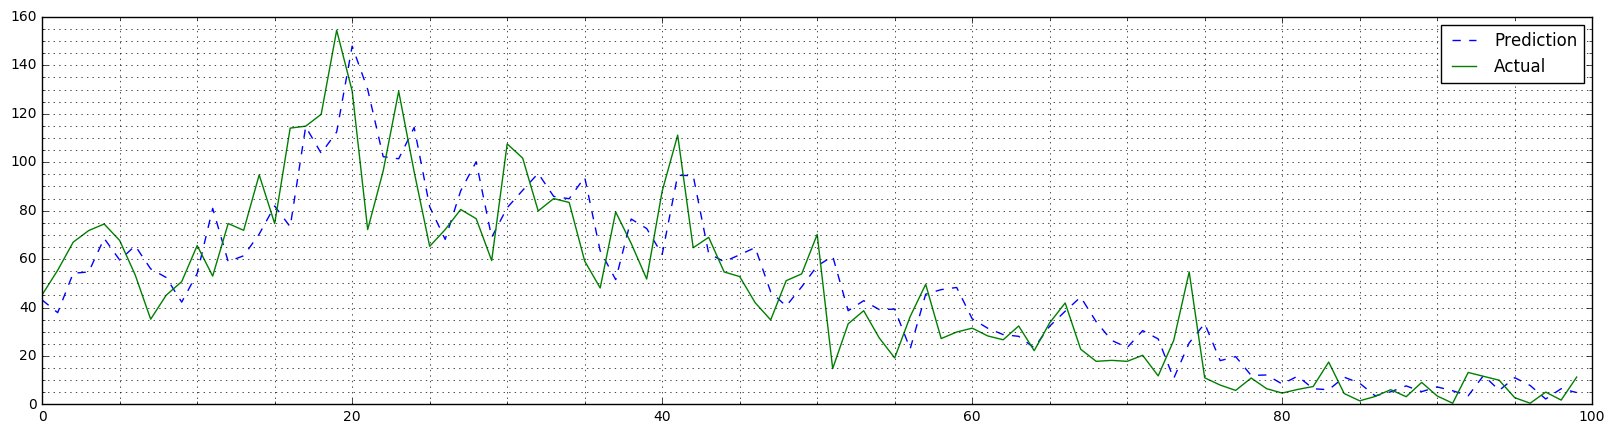

In [141]:
plt.rc('figure', figsize=(20, 5))
X = np.arange(0, 100)
plt.plot(X, rf.predict(test_data.iloc[:100][c[1:]]), label='Prediction', linestyle='--')
plt.plot(X, test_data['target'].iloc[:100], label='Actual', linestyle='-')
plt.legend()
plt.grid(b=True, which='major')
plt.grid(b=True, which='minor')
plt.minorticks_on()

rf.score(test_data[c[1:]], test_data['target'])